## What is Coursera 
<p>Coursera was founded by Daphne Koller and Andrew Ng in 2012 with a vision of providing life-transforming learning experiences to learners around the world. Today, Coursera is a global online learning platform that offers anyone, anywhere, access to online courses and degrees from leading universities and companies. Coursera received B Corp certification in February 2021, which means that we have a legal duty not only to our shareholders, but to also make a positive impact on society more broadly, as we continue our efforts to reduce barriers to world-class education for all.
<p><img src="Grid_Coursera_Partners_updated.png" ></p></p>
<p>82 million learners, 100+ Fortune 500 companies, and more than 6,000 campuses, businesses, and governments come to Coursera to access world-class learning—anytime, anywhere.</p>


Task 1: Instructions Load the required libraries and the coursera dataset. Use pd.read_csv to read in .csv and save it into df Show at least the first six entries of nobel using the head() method

In [1]:
# Loading in required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb
from matplotlib.ticker import PercentFormatter
!pip install langdetect
import langdetect


# Reading in the coursera data
df=pd.read_csv("../input/coursera-data/coursea_data.csv")

# show first entries
df.head(6)

     |████████████████████████████████| 981 kB 4.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=b34907258a4baf1fb4bfe3c752ab00b524274415c7d6c27db147b245497712ce
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k


## Top 10 organizations
Coursera partners with more than 200 leading universities and companies to bring flexible, affordable, job-relevant online learning to individuals and organizations worldwide. 
<p>But who is the most common organizations which provide courses?</p>


Task 2: plot the top 10 organizations in providing courses 


In [2]:

reg_df = df.course_organization.value_counts()[:10].reset_index()
reg_df.columns = ['organization','count']
fig = px.bar(reg_df,y='organization',x='count',color_discrete_sequence=['#0070c0'],text="count")
fig.show()

## Courses Ratings distribution

Task 3: make a plot to show the distribution of courses ratings by sns.kdeplot

<AxesSubplot:xlabel='course_rating', ylabel='Density'>

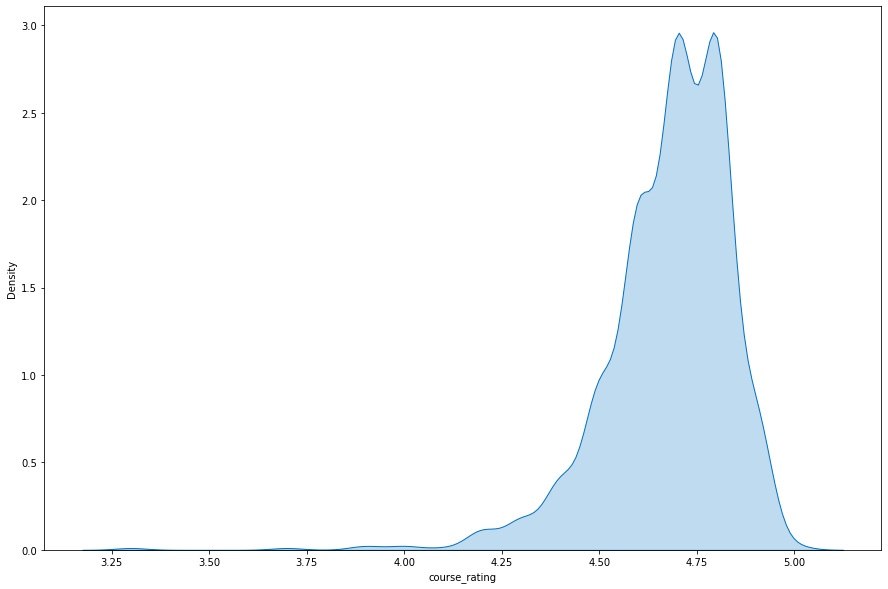

In [3]:
plt.figure(figsize=(15,10))
sns.kdeplot(df['course_rating'],fill=True,color="#0070c0")

## Certificates type proportion
Task 4:show the proportion of the certificates types by ploting

In [4]:
pie_df = df.course_Certificate_type.value_counts().reset_index()
pie_df.columns = ['type','count']
fig = px.pie(pie_df, values='count', names='type',title='Proportion of certificates types',

             color_discrete_sequence=['#003f5c','#ffa600','#bc5090'])
fig.show()

## Difficulties proportion
Task 5:show the proportion of the difficulties by ploting

In [5]:
pie_df = df.course_difficulty.value_counts().reset_index()
pie_df.columns = ['course_difficulty','count']
fig = px.pie(pie_df, values='count', names='course_difficulty', title='Proportion of courses difficulties',
             color_discrete_sequence=['#003f5c','#ffa600','#bc5090','#ff764a'])
fig.show()

## what is the Language of the course
Task 6: make a new coloumn for the language of the course by detecting the title language using langdetect 

In [6]:
df['Language'] = df['course_title'].apply(lambda x: langdetect.detect(x))
df['Language'].value_counts()

en    726
es     48
fr     15
de     15
ru     14
it     14
nl     11
da      7
ca      7
pt      6
no      6
tl      5
af      4
ro      4
id      4
cy      1
bg      1
lt      1
hu      1
sq      1
Name: Language, dtype: int64

## changing k and m to real numbers
In the course_students_enrolled coloumn the number are written in this form 3k , 1m how can we change it to real numbers
<p>Task 7: replace k by 000 and m by 000000 

In [7]:
df['course_students_enrolled']=df['course_students_enrolled'].str.replace('k', '*1000')
df['course_students_enrolled']=df['course_students_enrolled'].str.replace('m', '*1000000')
df['course_students_enrolled'] = df['course_students_enrolled'].map(lambda x: eval(x))

In [8]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,Language
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0,en
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0,en
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0,en
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0,en
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0,en


## The effect of difficulty on the enrollment 
Task 8:Use groupby to group by  course_difficulty Then isolate the course_students_enrolled column and take the mean()
and sort them and plot them

In [9]:
diff= df.groupby('course_difficulty',as_index=False)['course_students_enrolled'].mean()
diff.sort_values(by='course_students_enrolled',ascending=False)

,course_difficulty,course_students_enrolled
3,Mixed,133633.155080
1,Beginner,81974.948665
2,Intermediate,73264.141414
0,Advanced,66547.368421


In [10]:
fig = px.bar(diff,y='course_students_enrolled',x='course_difficulty',color_discrete_sequence=['#316394'],text=round(diff["course_students_enrolled"],2))
fig.show()

## The effect of Certificate type on the enrollment 
Task 9:Use groupby to group by course_Certificate_type  Then isolate the course_students_enrolled column and take the mean()
and sort them and plot them

In [11]:
certy= df.groupby('course_Certificate_type',as_index=False)['course_students_enrolled'].mean()
certy.sort_values(by='course_students_enrolled',ascending=False)

,course_Certificate_type,course_students_enrolled
1,PROFESSIONAL CERTIFICATE,190700.000000
2,SPECIALIZATION,91791.919192
0,COURSE,87854.467354


In [12]:
fig = px.bar(certy,y='course_students_enrolled',x='course_Certificate_type',color_discrete_sequence=['#316394'],text=round(certy["course_students_enrolled"],2))
fig.show()

## Top enrolled courses
Task 10:sort the course_title by the course_students and  plot them 

In [13]:
x=df[['course_title','course_students_enrolled']].sort_values(by='course_students_enrolled',ascending=False).head(10)
x

,course_title,course_students_enrolled
564,Machine Learning,3200000.0
815,The Science of Well-Being,2500000.0
688,Python for Everybody,1500000.0
674,Programming for Everybody (Getting Started wit...,1300000.0
196,Data Science,830000.0
129,Career Success,790000.0
261,English for Career Development,760000.0
765,Successful Negotiation: Essential Strategies a...,750000.0
199,Data Science: Foundations using R,740000.0
211,Deep Learning,690000.0


In [14]:
fig = px.bar(x,y='course_title',x='course_students_enrolled',color_discrete_sequence=['#316394'],text="course_students_enrolled")
fig.show()

## 5 stars courses
Task 11:make the same as the previous task to plot the courses with rate 5 

In [15]:
yi=df[['course_title','course_rating']].sort_values(by='course_rating',ascending=False).head(2)
yi

,course_title,course_rating
251,El Abogado del Futuro: Legaltech y la Transfor...,5.0
432,Infectious Disease Modelling,5.0


In [16]:
fig = px.bar(yi,y='course_title',x='course_rating',color_discrete_sequence=['#316394'],text="course_rating")
fig.show()

## Relations between difficulty , enrollment and language
Task 12:plot this relation by a box plot and let the color key be the language

In [17]:
fig = px.box(df, x="course_difficulty", y="course_students_enrolled",color="Language")

fig.show()